In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [17]:
def load_request_data():
    """
    Load request stats data into a structured dictionary.
    """
    dict_df = defaultdict(list)
    for file in glob.glob("../output/request_stats_*.csv"):
        # Extract strategies and user count from file name
        parts = file.split("_")
        power_strategy = parts[2].strip()
        assignment_strategy = parts[3].strip()
        user_count = int(parts[4].replace(".csv", "").strip())

        # Create a normalized combined strategy key
        strategy_key = f"{power_strategy} + {assignment_strategy}"

        # Read the file into a DataFrame
        df = pd.read_csv(file)
        dict_df[strategy_key].append(
            {"user_count": user_count, "file_name": file, "data": df}
        )
    return dict_df

In [18]:
def plot_request_time_distribution(
    dict_df, power_strategy, assignment_strategy, user_count, bins=10
):
    """
    Plot the request time distribution for a specific run.

    Parameters:
        dict_df (dict): Dictionary containing request stats data.
        power_strategy (str): The power strategy to filter.
        assignment_strategy (str): The assignment strategy to filter.
        user_count (int): The user count to filter.
        bins (int): Number of bins for the histogram.
    """
    # Normalize the strategy key
    strategy_key = f"{power_strategy} + {assignment_strategy}"
    print(f"Looking for strategy key: '{strategy_key}' with {user_count} users.")

    # Find the selected run
    runs = dict_df.get(strategy_key, [])
    selected_run = next((run for run in runs if run["user_count"] == user_count), None)

    if not selected_run:
        print(f"\nNo run found for strategy '{strategy_key}' with {user_count} users.")
        return

    df = selected_run["data"]
    print(f"\nSelected file: {selected_run['file_name']}")

    # Calculate time taken per request
    request_tick_time = df["last_status_change"] - df["creation_time"]
    request_time = (
        request_tick_time * 0.1
    )  # Convert ticks to time (assuming 0.1 is the time multiplier)

    # Plot request time distribution
    plt.figure(figsize=(10, 5))
    plt.hist(request_time, bins=bins, edgecolor="k", alpha=0.7)
    plt.title("Request Time Distribution")
    plt.xlabel("Request Time (s)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [19]:
# Load the request data
dict_df = load_request_data()
len(dict_df)

6

Looking for strategy key: 'OnDemand + PSO' with 100 users.

Selected file: ../output\request_stats_OnDemand_PSO_100.csv


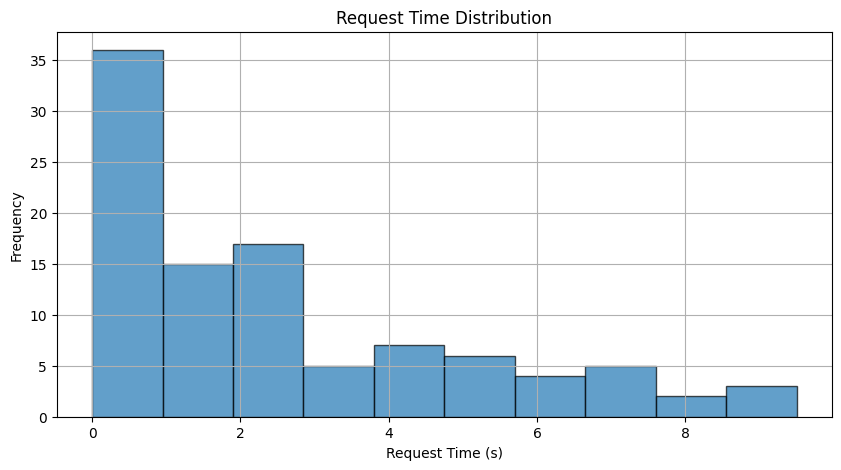

In [20]:
# Plot the request time distribution for a specific run
plot_request_time_distribution(
    dict_df,
    power_strategy="OnDemand",
    assignment_strategy="PSO",
    user_count=100,
    bins=10,
)